In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import math 


In [4]:
# filepath = "edgelist/BlogCatalog-edgelists.csv"

In [5]:
# colNames=["Start", "End"]
# edgeData = pd.read_csv(filepath, names=colNames)

In [6]:
# edgeData.head()
# # edgeData.size
# # edgeData.shape
# # edgeData[edgeData.isnull().any(axis=1)]


,Start,End
0,1,176
1,1,233
2,1,283
3,1,371
4,1,394


In [7]:
# #Add nodes
# nodes = []
# #loop throug data records
# for i in range (0, edgeData.shape[0]):
#     #append every node
#     nodes.append(edgeData.iloc[i,0])
#     nodes.append(edgeData.iloc[i,1])
# #creating a set of nodes    
# nodes = set(nodes)
# #sorting the nodes in increasing order
# uniqueNodes = (list(nodes))
# uniqueNodes.sort()
# #adding the nodes to the graph
# G.add_nodes_from(uniqueNodes)



In [8]:
# # Add edges
# #loop from 0 to amount of records
# for i in range (0, edgeData.shape[0]):
#     #add the edge to the graph
#     G.add_edge(edgeData.iloc[i,0], edgeData.iloc[i,1])

In [2]:
# Create Graph
G = nx.Graph()

C:\Users\Max\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


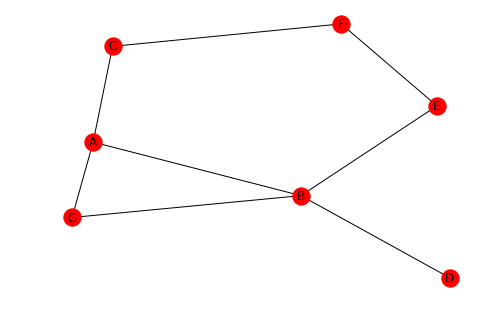

In [3]:
#Small example
G.add_nodes_from(["A","B","C","D","E","F","G"])
G.add_edge("A", "G")
G.add_edge("A", "B")
G.add_edge("A", "C")
G.add_edge("B", "D")
G.add_edge("B", "E")
G.add_edge("B", "G")
G.add_edge("C", "F")
G.add_edge("E", "F")


# Draw graph
nx.draw(G, with_labels = True)
plt.show()

In [31]:
def bfs(graph, start, budget, e):
    vertex_neighbors = [n for n in G.neighbors(start)]
    m = math.floor(budget/len(vertex_neighbors)) # 1
    allbudgets = {}
    ebudgets = {}
    for node in graph:
        ebudgets[node] = 1
    for node in graph:
        allbudgets[node] = 0
        
    allbudgets[start] = m #assign the budget to the start vertix
    visited = []
    queue = [start]
    while queue:
        vertex = queue.pop(0)
        
        if ebudgets[vertex] < e:
            break
            
        visited.append(vertex)
        vertex_neighbors = [n for n in G.neighbors(vertex)]
        if len(vertex_neighbors) >= allbudgets[vertex]: 
            newVertexies = np.random.choice(vertex_neighbors, allbudgets[vertex], replace=False)
        else:
            newVertexies = np.random.choice(vertex_neighbors, allbudgets[vertex], replace=True)    
        queue.extend(newVertexies)
        allbudgets, ebudgets = updatebudgets(newVertexies, allbudgets, ebudgets)
        
    return visited

In [32]:
def updatebudgets(newVertexies, allbudgets, ebudgets):
    for vertex in newVertexies:
        allbudgets[vertex] += 1
        ebudgets[vertex] = random.uniform(0, 1)
        
    return allbudgets, ebudgets
    

In [33]:

budget = 6
e = 0.2

for startvertex in G:
    print("Running BFS from vertex:", startvertex)
    print(bfs(G, startvertex, budget, e)) 

Running BFS from vertex: A
['A', 'G', 'C', 'B', 'F', 'G', 'E', 'A']
Running BFS from vertex: B
['B', 'A']
Running BFS from vertex: C
['C']
Running BFS from vertex: D
['D', 'B', 'B', 'B', 'B', 'B', 'B']
Running BFS from vertex: E
['E']
Running BFS from vertex: F
['F']
Running BFS from vertex: G
['G']


In [ ]:
# def bfs2(graph, start):
#     visited = []
#     queue = [start]
#     while queue:
#         vertex = queue.pop(0)
#         if vertex not in visited:
#             visited.append(vertex)
#             vertex_neighbors = [n for n in G.neighbors(vertex)]
#             newVertexies = [x for x in vertex_neighbors if x not in visited]
#             queue.extend(newVertexies)
         
#     return visited

In [15]:
# vertex_neighbors = [n for n in G.neighbors("A")]
# l3 = [x for x in vertex_neighbors if x not in ['G']]
# l3

['B', 'C']

In [55]:
# list = [20, 30, 40, 50 ,60, 70, 80]
# sampling = np.random.choice(list, 4, replace=False)
# print("sampling with choices() ", sampling)

sampling with choices()  [40 70 60 80]


In [10]:
# # Execute 10 times this command sequence
# numOperations = 10
# for step in range(1, numOperations):
#     # Choose a random start node
#     vertexid = 1
#     # Dictionary that associate nodes with the amount of times it was visited
#     visited_vertices = {}
#     # Store and print path
#     path = [vertexid]
    
#     print("Step: %d" % (step))
#     # Restart the cycle
#     counter = 0
#     # Execute the random walk with size 100 (100 steps)
#     randomWalkSize = 100
#     for counter in range(1, randomWalkSize): 
#         # Extract vertex neighbours vertex neighborhood
#         vertex_neighbors = [n for n in G.neighbors(vertexid)]
#         # Set probability of going to a neighbour is uniform
#         probability = []
#         probability = probability + [1./len(vertex_neighbors)] * len(vertex_neighbors)
#         # Choose a vertex from the vertex neighborhood to start the next random walk
#         vertexid = np.random.choice(vertex_neighbors, p=probability)
#         # Accumulate the amount of times each vertex is visited
#         if vertexid in visited_vertices:
#             visited_vertices[vertexid] += 1
#         else:
#             visited_vertices[vertexid] = 1

#         # Append to path
#         path.append(vertexid)

#     # Organize the vertex list in most visited decrescent order
#     mostvisited = sorted(visited_vertices, key = visited_vertices.get,reverse = True)
#     print("Path: ", path)
    
#     # Separate the top 10 most visited vertex
#     print("Most visited nodes: ", mostvisited[:10])

Step: 1
Path:  [1, 7495, 2340, 2804, 219, 4026, 955, 8743, 5051, 5636, 4984, 7287, 3479, 750, 9092, 4839, 9098, 2453, 7305, 7394, 4886, 7098, 661, 6860, 8248, 3122, 8387, 7515, 687, 7224, 6568, 2254, 1740, 6392, 588, 8917, 7727, 375, 6346, 4669, 659, 6753, 8911, 3767, 7496, 4839, 4945, 446, 6973, 5681, 2082, 6873, 4501, 3201, 3685, 5537, 1790, 3561, 5881, 6141, 1798, 7852, 7623, 7150, 4984, 4420, 3262, 965, 5790, 8270, 3540, 4491, 5506, 3940, 4903, 6641, 5426, 7076, 9781, 9941, 9198, 9751, 8736, 730, 8157, 2787, 5264, 2558, 4984, 5325, 4407, 3607, 1001, 1774, 7373, 7409, 7989, 7400, 3056, 2438]
Most visited nodes:  [4984, 4839, 7495, 2340, 2804, 219, 4026, 955, 8743, 5051]
Step: 2
Path:  [1, 4836, 5976, 5162, 2019, 8270, 5386, 810, 6141, 6142, 7806, 4576, 2803, 4225, 6243, 6062, 458, 7373, 3503, 5085, 5700, 2033, 477, 2340, 3226, 3222, 17, 6889, 4870, 3713, 4997, 5171, 5298, 5172, 2085, 1378, 6447, 2465, 1383, 161, 2188, 6860, 176, 9341, 8552, 3407, 10271, 9172, 7684, 7121, 102, 8782, 